>Юрий, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>**
>
>**<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>**
>  
> **<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

# Описание проекта<br>
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем <br>распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.<br>
Описание тарифов<br>
Тариф «Смарт»<br>
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>
Тариф «Ультра»<br>
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей<br>
Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь<br> проговорил всего 1 секунду, в тарифе засчитывается целая минута.

# Этап 1. Импортирую данные и библиотеки.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [71]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [72]:
# Импортирую датасеты
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

## Изучим таблицы.
### Таблица с пользователями

In [73]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [74]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


в churn_date 38 неправильных данных, это нужно исправить

In [76]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [77]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Исправил :)

### Таблица со звонками (calls)

In [78]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [79]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [80]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [81]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [82]:

calls['id'] = calls['id'].astype('int')

In [83]:
#округляю значения длительности разговора
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [84]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


Присутствуют нулевые звонки. Отнесем их к звонкам, которые продолжались, меньше одной минуты

In [85]:
calls['duration'] = calls['duration'].replace(0, 1)

In [86]:
calls.describe()

,id,duration,user_id
count,"202,607.00","202,607.00","202,607.00"
mean,"1,212,254.17",7.35,"1,253.94"
std,"1,725,756.38",5.73,144.72
min,"10,000.00",1.00,"1,000.00"
25%,"1,012,286.50",2.00,"1,126.00"
50%,"1,179,376.00",6.00,"1,260.00"
75%,"1,358,125.50",11.00,"1,379.00"
max,"14,581,154.00",38.00,"1,499.00"


In [87]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


### Таблица с сообщениями 

In [88]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [89]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [90]:

messages['id'] = messages['id'].astype('int')

In [91]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [92]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


### Теперь таблица с интернетом

In [93]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [94]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,"149,396.00","149,396.00","149,396.00"
mean,"74,697.50",370.19,"1,252.10"
std,"43,127.05",278.30,144.05
min,0.00,0.00,"1,000.00"
25%,"37,348.75",138.19,"1,130.00"
50%,"74,697.50",348.01,"1,251.00"
75%,"112,046.25",559.55,"1,380.00"
max,"149,395.00","1,724.83","1,499.00"


In [95]:

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [96]:
internet['id'] = internet['id'].astype('int')

In [97]:

internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [98]:

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


### Таблицу с тарифами

In [99]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [100]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [101]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



>**<span style="color:green">Здесь всё структурировано и по делу, класс. </span>**
>


# 2 Этап. Подготовка данных.

### Считаю для каждого пользователя кол-во сделанных звокнов и израсходованнах минут разговора по месяцам.

In [102]:

calls['month'] = calls['call_date'].dt.month_name()


>**<span style="color:orange">Я бы на твоем месте использовал функцию `dt.month` — так у нас бы данные остались отсортированы по дате. </span>**
>


In [103]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,1,1000,July
1,10001,2018-08-17,1,1000,August
2,10002,2018-06-11,3,1000,June
3,10003,2018-09-21,14,1000,September
4,10004,2018-12-15,6,1000,December


In [104]:
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [105]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


### Считаю кол-во отправленных сообщений по месяцам.

In [106]:

messages['month'] = messages['message_date'].dt.month_name()

In [107]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [108]:

user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [109]:

user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


### Считаю объем израсходованного интернет-трафика по месяцам. 

In [110]:
internet['month'] = internet['session_date'].dt.month_name()

In [111]:

internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,112.95,2018-11-25,1000,November
1,1,10001,"1,052.81",2018-09-07,1000,September
2,2,10002,"1,197.26",2018-06-25,1000,June
3,3,10003,550.27,2018-08-22,1000,August
4,4,10004,302.56,2018-09-24,1000,September


In [112]:

user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [113]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,"14,055.93"
1,1000,December,"9,817.61"
2,1000,July,"14,003.64"
3,1000,June,"23,233.77"
4,1000,May,"2,253.49"


### Считаю месячную выручку с каждого пользователя

In [114]:
# Соединяю путём использования метода merge
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [115]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,August,418.00,52.00,81.00
1,1000,December,341.00,46.00,70.00
2,1000,July,346.00,47.00,75.00
3,1000,June,187.00,43.00,60.00
4,1000,May,164.00,22.00,22.00


In [116]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
3209,1489,December,nan,nan,35.00,"17,322.51"
3210,1489,November,nan,nan,20.00,"17,491.56"
3211,1489,October,nan,nan,21.00,"19,559.44"
3212,1489,September,nan,nan,32.00,"17,206.30"
3213,1476,April,nan,nan,nan,530.78


In [117]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,August,418.00,52.00,81.00,"14,055.93"
1,1000,December,341.00,46.00,70.00,"9,817.61"
2,1000,July,346.00,47.00,75.00,"14,003.64"
3,1000,June,187.00,43.00,60.00,"23,233.77"
4,1000,May,164.00,22.00,22.00,"2,253.49"


In [118]:

tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [119]:

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [120]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [121]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [122]:
# Проверяю, где остались NaN
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [123]:
# Заполняю пропуски в столбцах с смс, интернетом и звокнами на 0
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [124]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [125]:
# Проверяю кол-во дубликатов
df.duplicated().sum()

0


>**_<span style="color:green">По агрегации данных и объединению таблиц у тебя полный порядок. Молодец что используешь метод `outer` при объединении таблиц по звонкам, сообщениям и трафике. Это позволило тебе учесть всех пользователей, даже если они не пользовались какой-либо из услуг в рамках одного месяца. Напрмер, пользователь может пользоваться планшетом - не совершать звонки, но при этом активно использовать интернет и т.д. </span>_**


In [126]:
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [127]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [128]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [129]:

df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [130]:
df.sort_values(by='total_paid').tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
1792,1286,December,751.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,"4,664.00","5,214.00"
3105,1486,November,788.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"5,085.00","5,635.00"
259,1042,December,755.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,"5,098.00","5,648.00"
1620,1261,December,"1,102.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,"5,183.00","5,733.00"
3104,1486,December,"1,025.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"6,203.00","6,753.00"



>**_<span style="color:green">Красивое решение с функцией строк для подсчёта выручки.</span>_**
>


## 3 Этап. Анализ данных. 

In [131]:

df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,"3,214.00","3,214.00"
mean,517.13,"1,496.19"
std,741.66,785.58
min,0.00,550.00
25%,0.00,711.25
50%,122.50,"1,584.00"
75%,853.75,"1,950.00"
max,"6,203.00","6,753.00"


In [132]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 7000)

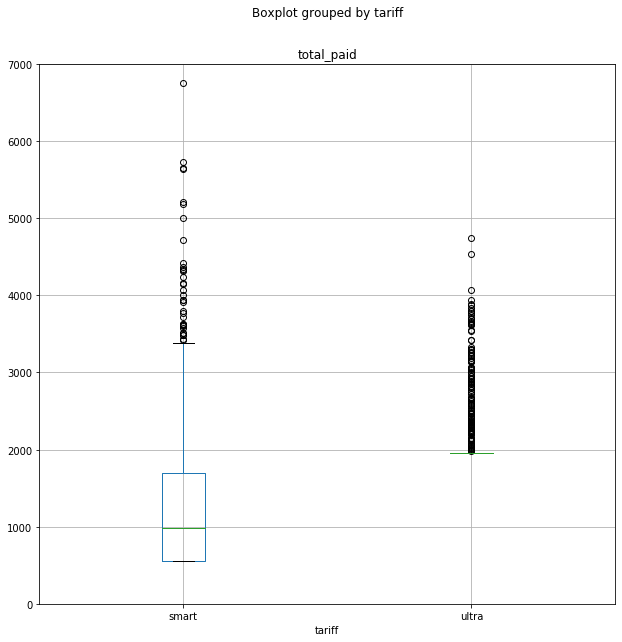

In [133]:
df.boxplot('total_paid', by='tariff', figsize=(10,10)).set_ylim(0,7000)

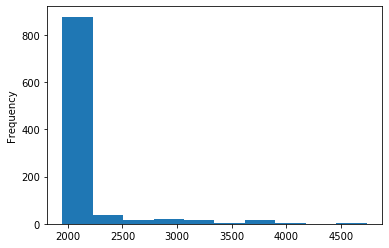

In [134]:
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10);

In [135]:

df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

В тарифе смарт, люди чаще переплачивают, чем в тарифе ультра.

In [136]:
df.groupby('tariff')\
  .agg({'month_calls_duration':['median','mean','var','std']})\
  .style.format("{:.2f}")

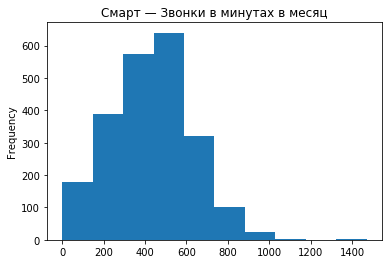

In [137]:
#строю график для тарифа Смарт, по длительности разговора.
#Как и просил в предыдщуем проекте, подписываю график :)

df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Смарт — Звонки в минутах в месяц');

Text(0.5, 1.0, 'Ультра — Звонки в минутах в месяц')

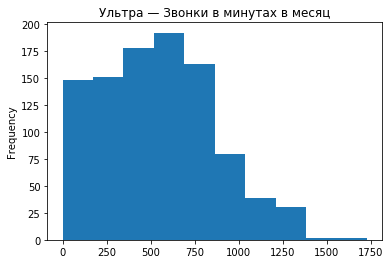

In [138]:
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Ультра — Звонки в минутах в месяц')

На графике нет экстремальных данных. В среднем в тарифе Смарт, люди разговаривают по 450 минут, в Ультре  от 550 и прибл до 700. Это говорит о том, что в тарифе Ультра у людей остается запас минут, в отличии от тарифа Смарт.

In [139]:
df.groupby('tariff')\
  .agg({'mb_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Интернет в МБ в месяц')

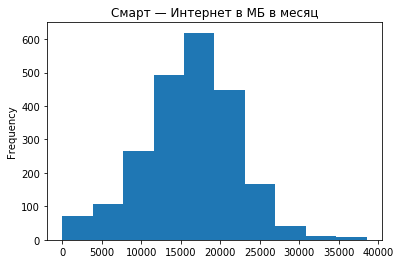

In [140]:

df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — Интернет в МБ в месяц')

Text(0.5, 1.0, 'Ультра — Интернет в МБ в месяц')

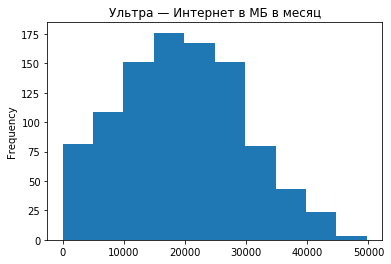

In [141]:

df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — Интернет в МБ в месяц')

Оба графика показывают, что медиана и среднее находятся рядом. У тарифа Ультра, запас интернета больше.

In [142]:

df.groupby('tariff')\
  .agg({'sms_total_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — СМС в месяц')

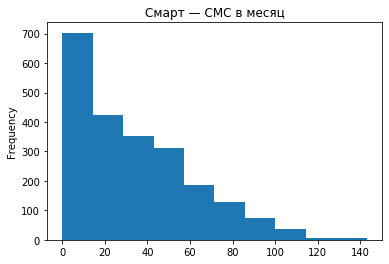

In [143]:
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — СМС в месяц')

Text(0.5, 1.0, 'Ультра — СМС в месяц')

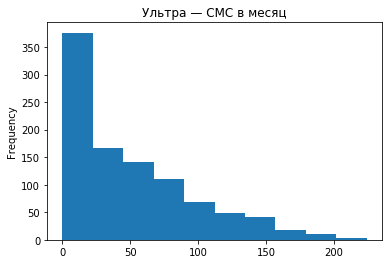

In [144]:

df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — СМС в месяц')

На обоих тарифах, смс не пользуются особой популярностью в обоих тарифах.

### Вывод

Оператору больше денег приносит тариф Ультра, даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа Смарт не тратят столько денег, чтобы перегнать стоимость тарифа Ультра. Таким образом, для пользователя выгоднее тариф Смарт. По средним значениям выручки пользователей Москвы и регионов мы видим, что разница не велика. Пользователи примерно отправляют одинаковое количество смс и звонят примерно одинаковое количество минут. В Москве чуть больше потребляют трафика – ожидаемо с учетом покрытия и скорости.


>**_<span style="color:green">Здесь всё хорошо. Но, кажется, с точки зрения нашей задачи сравнения двух тарифов было лучше если бы попробовали наложить гистограммы друг на друга (чтобы они полностью не перекрывали можно использовать параметр прозрачности `alpha`). </span>_**
>
>**_<span style="color:red">~~В задании также требовалось описать полученные типы распределений наших параметров. А также нужно написать развернутый промежуточный вывод по этому блоку, куда следует добавить средние показатели по использованию услуг, и описать какое количество пользователей не укладывается в рамки лимитных ограничений.~~</span>_**

# 4 Этап. Проверка гипотез.

In [145]:
# Функция для удаления выбросов

def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]


>**_<span style="color:green">Очень здорово, что ты используешь функции для подобных однотипных и повторяющихся операций. Класс! Но в нашем случае я бы всё-таки не стал искать выбросы в наших данных. В случае данных от оператора, как тут, выбросами я бы назвал значения, которые явно являются ошибочными (опечатки), либо случаи, когда в данные попали пользователи с аномально большим количеством звонков или смсок, которые скорее характерны для коммерческих аккаунтов. В нашей ситуации все выглядит вполне реалистично. </span>_**
>


Для проверки гипотез, буду использовать t-критерий Стьюдента

Наши гипотези: 
<BR>H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается<BR>
H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [146]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


In [147]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [148]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [149]:

smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [151]:
alpha = 0.05

results = st.ttest_ind(ultra, smart, equal_var= False)


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3182106890742663e-188
Отвергаем нулевую гипотезу


Наши гипотезы 2:

<br>H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
<br>H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [155]:

df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [156]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [157]:

moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [162]:
results = st.ttest_ind(moscow, province, equal_var= False)


In [163]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29625669310437025
Не получилось отвергнуть нулевую гипотезу


>**_<span style="color:red">~~C формулировкой и проверкой гипотез у тебя полный порядок. Но нужно посчитать дисперсии наших выборок и учесть это при проведении теста, передав в параметр `equal_var` соответствующее значение. Принято значимыми различиями считать разницу в 5 и более процентов. Добавь, пожалуйста.~~</span>_**
>


# 5 Этап. Формулировка вывода.

Поведение пользователей отличается в зависимости от их тарифа. В тарифе "Ультра", у людей больший запас по интернету и минутам. СМС-ками никто не пользуется, исходя из полученных диаграм. По оплате тарифов, относительно региона, нет разницы.

>**Спасибо тебе за сдачу твоего проекта. Работа получилась просто замечательная и хорошо структурированная. Видно, что ты отлично справился с материалами спринта и уверенно применяешь полученные навыки на практике. Для зачёта проекта тебе осталось совсем чуть-чуть поработать и исправить ряд некритичных недочётов, а также нужно написать развернутые промежуточные и общие выводы по твоей работе.**
>
>**Отдельно хочу тебя похвалить за твой комплексный подход к оформлению проекта, твой чистый код и развернутые выводы и комментарии. Продолжай и дальше совершенствоваться в этих аспектах в своих последующих проектах.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
>
>**Update: Привет еще раз! Теперь все отлично, и твой проект зачтен, поздравляю! ;)**